In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], index_col='date')
# df.index = pd.to_datetime(df.index, errors='coerce')

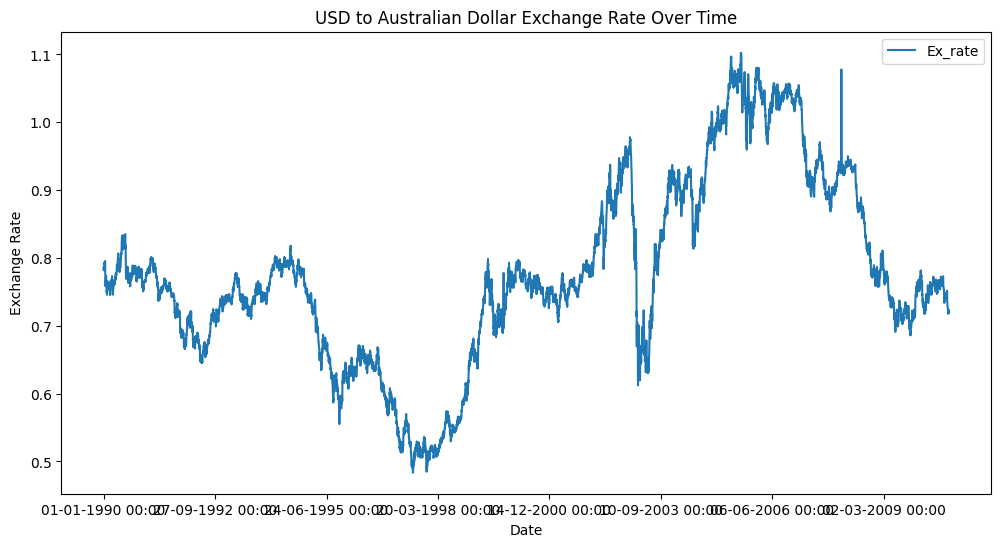

In [17]:

# Visualizing the time series
df.plot(figsize=(12,6))
plt.title('USD to Australian Dollar Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


In [18]:
# Handling missing values
df.fillna(method='ffill', inplace=True)

# Checking stationarity
result = adfuller(df.iloc[:, 0])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Time series is non-stationary; differencing required.")
    df_diff = df.diff().dropna()
else:
    print("Time series is stationary.")
    df_diff = df

<ipython-input-18-bdf963f8a0a9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
Time series is non-stationary; differencing required.


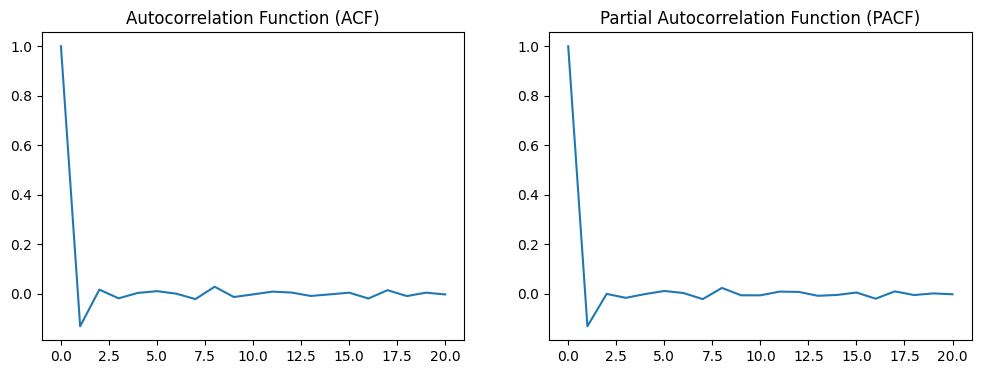

In [19]:
# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(y=acf(df_diff.iloc[:, 0], nlags=20), x=range(21), ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF)")
sns.lineplot(y=pacf(df_diff.iloc[:, 0], nlags=20), x=range(21), ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

In [20]:
# Fitting ARIMA model
p, d, q = 1, 1, 1  # Adjust based on ACF/PACF analysis
model_arima = ARIMA(df.iloc[:, 0], order=(p, d, q))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 28 Jan 2025   AIC                         -56102.322
Time:                        06:38:32   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

datetime64[ns]


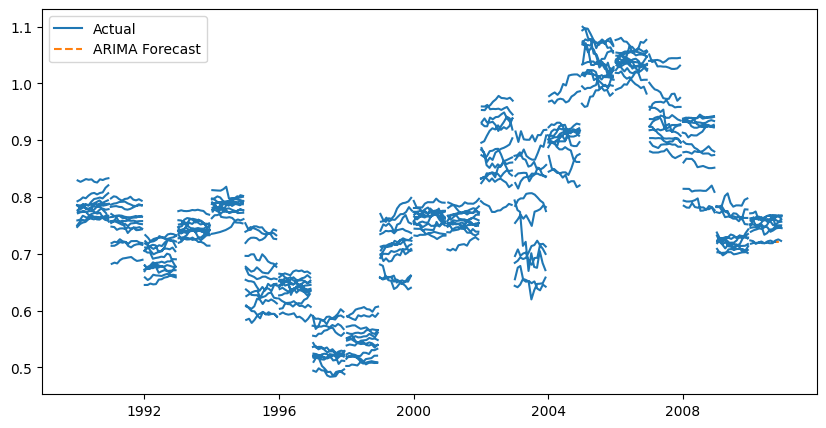

DatetimeIndex(['2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14',
               '2010-10-15'],
              dtype='datetime64[ns]', freq='D')
[0.72082642 0.72082624 0.72082626 0.72082626 0.72082626]


In [26]:
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], index_col='date')
df.index = pd.to_datetime(df.index, errors='coerce')  # Explicitly convert
print(df.index.dtype)  # Should output: datetime64[ns]
last_date = df.index[-1]
if not isinstance(last_date, pd.Timestamp):
    last_date = pd.to_datetime(last_date)

future_dates = pd.date_range(last_date, periods=31, freq='D')[1:]
forecast_arima = np.array(forecast_arima)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df.iloc[:, 0], label='Actual')  # Ensure actual data uses datetime index
plt.plot(future_dates, forecast_arima, label='ARIMA Forecast', linestyle='dashed')
plt.legend()
plt.show()
print(future_dates[:5])  # Check if future_dates has correct datetime values
print(forecast_arima[:5])  # Ensure forecast_arima has numeric values


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


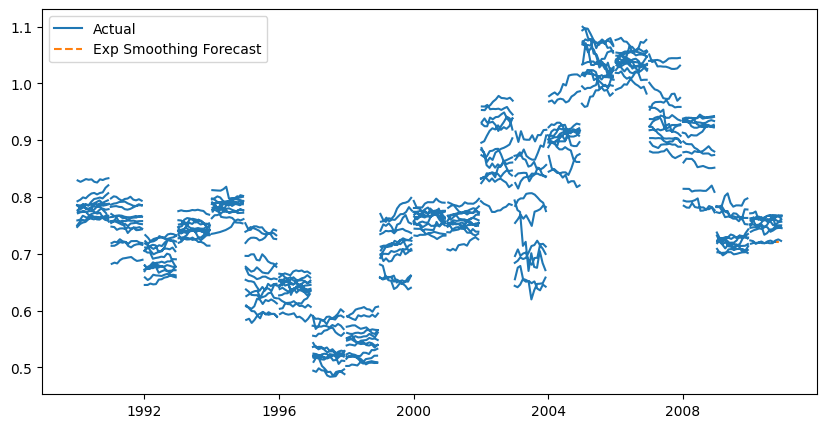

In [23]:
# Exponential Smoothing Model
model_exp = ExponentialSmoothing(df.iloc[:, 0], trend='add', seasonal=None, seasonal_periods=None)
model_exp_fit = model_exp.fit()
forecast_exp = model_exp_fit.forecast(steps=30)
# Forecasting with Exponential Smoothing
plt.figure(figsize=(10,5))
plt.plot(df.iloc[:, 0], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast_exp, label='Exp Smoothing Forecast', linestyle='dashed')
plt.legend()
plt.show()


In [27]:
# Evaluation Metrics
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f'MAE: {mae}, RMSE: {rmse}')
    return mae, rmse


In [28]:
# Compare last 30 observations (if available) with forecasted values
actual_values = df.iloc[-30:, 0] if len(df) > 30 else df.iloc[:, 0]
arima_mae, arima_rmse = evaluate_model(actual_values, forecast_arima[:len(actual_values)])
exp_mae, exp_rmse = evaluate_model(actual_values, forecast_exp[:len(actual_values)])

print("\nModel Comparison:")
print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Exponential Smoothing - MAE: {exp_mae}, RMSE: {exp_rmse}")


MAE: 0.012724006489305202, RMSE: 0.016982710912755217
MAE: 0.012755756156713368, RMSE: 0.017005229952751045

Model Comparison:
ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing - MAE: 0.012755756156713368, RMSE: 0.017005229952751045
